# PHYS 243 Final Project

In [1]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

## 1-Neural Networks

## 2-Twitter Sentiment Analysis Dataset
- Task: Classify sentiment (positive, negative, neutral)

In [2]:
train_df = pd.read_csv('twitter_training.csv')
test_df = pd.read_csv('twitter_validation.csv')

### Data Cleaning/ Preprocessing

In [3]:
train_df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
test_df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [5]:
train_df.duplicated().sum()

2700

In [6]:
test_df.duplicated().sum()

0

In [7]:
train_df.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [8]:
test_df.isnull().sum()

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

In [9]:
train_df.isna().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [10]:
test_df.isna().sum()

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

##### Add new column names to both training and testing datasets

In [11]:
# Set new column names for both training and validation datasets
column_names = ["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"]

train_df.columns = column_names
test_df.columns = column_names

In [12]:
train_df.head(2)

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...


In [13]:
test_df.head(2)

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...


In [14]:
# filled NA rows under the Tweet_Content column as empty strings
train_df['Tweet_Content'].fillna('', inplace=True)
train_df.isna().sum()

Tweet_ID         0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64

In [15]:
train_df.shape

(74681, 4)

In [16]:
test_df.shape

(999, 4)

Issue: Both testing and validation datasets are missing a column header row. Additionally, the training dataset has 2700 duplicated rows

##### Removed duplicates from training dataset
- Note: Although the "Tweet_ID" column does not have unique values per row, it is not relevant in modeling since we often leave out unique identifiers out (left as is)

In [17]:
train_df.duplicated().sum()

2700

In [18]:
train_df.drop_duplicates(inplace=True)

In [19]:
train_df.duplicated().sum()

0

In [20]:
train_df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [21]:
train_df.shape

(71981, 4)

##### Change "Irrelevant" to "Neutral" for the Sentiment column

In [22]:
train_df['Sentiment'].value_counts()

Sentiment
Negative      21787
Positive      19810
Neutral       17800
Irrelevant    12584
Name: count, dtype: int64

In [23]:
test_df['Sentiment'].value_counts()

Sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: count, dtype: int64

In [24]:
train_df.loc[train_df["Sentiment"] == "Irrelevant", "Sentiment"] = "Neutral"

In [25]:
train_df['Sentiment'].value_counts()

Sentiment
Neutral     30384
Negative    21787
Positive    19810
Name: count, dtype: int64

In [26]:
test_df.loc[test_df["Sentiment"] == "Irrelevant", "Sentiment"] = "Neutral"

In [27]:
test_df['Sentiment'].value_counts()

Sentiment
Neutral     456
Positive    277
Negative    266
Name: count, dtype: int64

##### Text cleaning and Tokenization (spaCy , TextBlob)
- Tokenization
- Lowercasing & removing punctuation
- Removing stop words (the, is, I, etc.)
- Removing Non-Alphanumeric Characters (removing numbers and special characters)
- Stemming and Lemmatization

In [28]:
train_df["Tweet_Content"]

0        I am coming to the borders and I will kill you...
1        im getting on borderlands and i will kill you ...
2        im coming on borderlands and i will murder you...
3        im getting on borderlands 2 and i will murder ...
4        im getting into borderlands and i can murder y...
                               ...                        
74676    Just realized that the Windows partition of my...
74677    Just realized that my Mac window partition is ...
74678    Just realized the windows partition of my Mac ...
74679    Just realized between the windows partition of...
74680    Just like the windows partition of my Mac is l...
Name: Tweet_Content, Length: 71981, dtype: object

In [29]:
print(train_df["Tweet_Content"].info())
print(test_df["Tweet_Content"].info())

<class 'pandas.core.series.Series'>
Index: 71981 entries, 0 to 74680
Series name: Tweet_Content
Non-Null Count  Dtype 
--------------  ----- 
71981 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 999 entries, 0 to 998
Series name: Tweet_Content
Non-Null Count  Dtype 
--------------  ----- 
999 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB
None


In [30]:
# Set datatype to string
train_df["Tweet_Content"].astype(str)
test_df["Tweet_Content"].astype(str)

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
994    ⭐️ Toronto is the arts and culture capital of ...
995    tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996    Today sucked so it’s time to drink wine n play...
997    Bought a fraction of Microsoft today. Small wins.
998    Johnson & Johnson to stop selling talc baby po...
Name: Tweet_Content, Length: 999, dtype: object

In [31]:
# Convert all text in lowercase
train_df["Tweet_Content"] = train_df["Tweet_Content"].str.lower()
test_df["Tweet_Content"] = test_df["Tweet_Content"].str.lower()

In [32]:
train_df["Tweet_Content"].head()

0    i am coming to the borders and i will kill you...
1    im getting on borderlands and i will kill you ...
2    im coming on borderlands and i will murder you...
3    im getting on borderlands 2 and i will murder ...
4    im getting into borderlands and i can murder y...
Name: Tweet_Content, dtype: object

In [33]:
test_df["Tweet_Content"].head()

0    bbc news - amazon boss jeff bezos rejects clai...
1    @microsoft why do i pay for word when it funct...
2    csgo matchmaking is so full of closet hacking,...
3    now the president is slapping americans in the...
4    hi @eahelp i’ve had madeleine mccann in my cel...
Name: Tweet_Content, dtype: object

In [34]:
train_df["Tweet_Content"]

0        i am coming to the borders and i will kill you...
1        im getting on borderlands and i will kill you ...
2        im coming on borderlands and i will murder you...
3        im getting on borderlands 2 and i will murder ...
4        im getting into borderlands and i can murder y...
                               ...                        
74676    just realized that the windows partition of my...
74677    just realized that my mac window partition is ...
74678    just realized the windows partition of my mac ...
74679    just realized between the windows partition of...
74680    just like the windows partition of my mac is l...
Name: Tweet_Content, Length: 71981, dtype: object

In [35]:
test_df["Tweet_Content"]

0      bbc news - amazon boss jeff bezos rejects clai...
1      @microsoft why do i pay for word when it funct...
2      csgo matchmaking is so full of closet hacking,...
3      now the president is slapping americans in the...
4      hi @eahelp i’ve had madeleine mccann in my cel...
                             ...                        
994    ⭐️ toronto is the arts and culture capital of ...
995    this is actually a good move tot bring more vi...
996    today sucked so it’s time to drink wine n play...
997    bought a fraction of microsoft today. small wins.
998    johnson & johnson to stop selling talc baby po...
Name: Tweet_Content, Length: 999, dtype: object

In [36]:
# Text vectorization (bag of words)
# Tokenize, vectorize, and remove stop words from the dataset
# Create a new vectorized dataset

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

x = vectorizer.fit_transform(train_df["Tweet_Content"])
dense_array_train = x.toarray()
feature_names = vectorizer.get_feature_names_out()

train_vectorized = pd.DataFrame(dense_array_train, columns=feature_names)

# Perform the same operations on the testing dataset
y = vectorizer.transform(test_df["Tweet_Content"])
dense_array_test = y.toarray()
feature_names = vectorizer.get_feature_names_out()

test_vectorized = pd.DataFrame(dense_array_test, columns=feature_names)

In [37]:
train_vectorized.head()

,00,000,00011,00014,00015,00016,00054,00105,00107,00303,...,اللعبه,حبيت,خلاص,عبر,فيديو,٥υ,घरच,การออกอากาศของฉ,นจาก,ℐℓ٥
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
test_vectorized.head()

,00,000,00011,00014,00015,00016,00054,00105,00107,00303,...,اللعبه,حبيت,خلاص,عبر,فيديو,٥υ,घरच,การออกอากาศของฉ,นจาก,ℐℓ٥
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Concat vectorized training dataframe with original dataset

train_df = pd.concat([train_df["Sentiment"], train_vectorized], axis=1)
test_df = pd.concat([test_df["Sentiment"], test_vectorized], axis=1)


In [40]:
train_df.head()

,Sentiment,00,000,00011,00014,00015,00016,00054,00105,00107,...,اللعبه,حبيت,خلاص,عبر,فيديو,٥υ,घरच,การออกอากาศของฉ,นจาก,ℐℓ٥
0,Positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
test_df.head()

,Sentiment,00,000,00011,00014,00015,00016,00054,00105,00107,...,اللعبه,حبيت,خلاص,عبر,فيديو,٥υ,घरच,การออกอากาศของฉ,นจาก,ℐℓ٥
0,Neutral,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Neutral,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
train_df.isna().sum()

Sentiment          2603
00                 2603
000                2603
00011              2603
00014              2603
                   ... 
٥υ                 2603
घरच                2603
การออกอากาศของฉ    2603
นจาก               2603
ℐℓ٥                2603
Length: 30765, dtype: int64

In [43]:
test_df.isna().sum()

Sentiment          0
00                 0
000                0
00011              0
00014              0
                  ..
٥υ                 0
घरच                0
การออกอากาศของฉ    0
นจาก               0
ℐℓ٥                0
Length: 30765, dtype: int64

In [44]:
# Remove NA values from the training dataset
train_df.dropna(inplace=True)
train_df.isna().sum()

Sentiment          0
00                 0
000                0
00011              0
00014              0
                  ..
٥υ                 0
घरच                0
การออกอากาศของฉ    0
นจาก               0
ℐℓ٥                0
Length: 30765, dtype: int64

### Data Analysis

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Distribution of Sentiments

In [46]:
train_df['Sentiment'].value_counts()

Sentiment
Neutral     29268
Negative    21158
Positive    18952
Name: count, dtype: int64

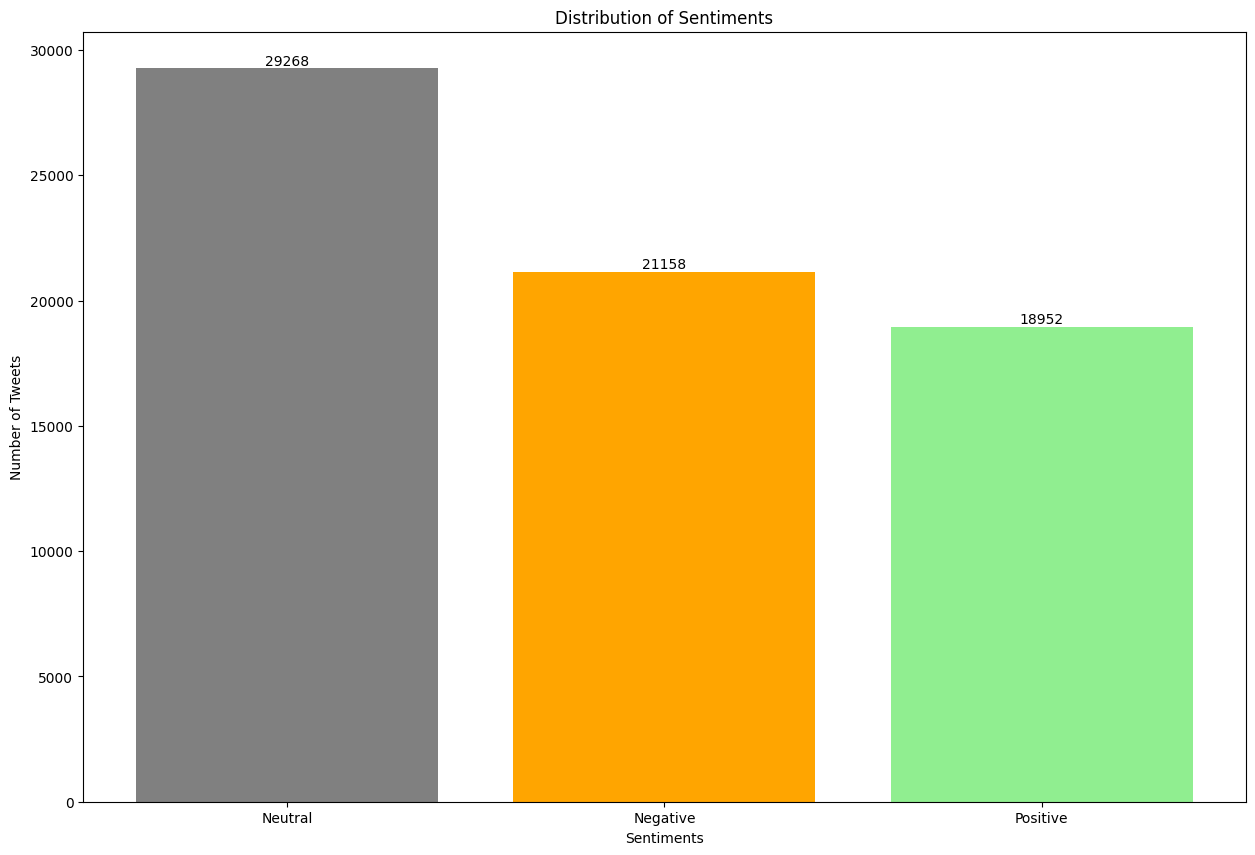

In [47]:
# Barplot showing the distribution of Sentiments
plt.figure(figsize=(15, 10))
barplot = plt.bar(train_df['Sentiment'].value_counts().index, train_df['Sentiment'].value_counts().values, color=['grey', 'orange', 'lightgreen'])

plt.title("Distribution of Sentiments")
plt.xlabel("Sentiments")
plt.ylabel("Number of Tweets")
plt.bar_label(barplot, label_type='edge')
plt.show()

### Model Training and Testing
- Logistic Regression, Naive Bayes, SVM, Random Forest

In [48]:
# Replace Sentiment values with numerical values
train_df["Sentiment"].replace({"Neutral": 0, "Negative": 1, "Positive": 2}, inplace=True)
test_df["Sentiment"].replace({"Neutral": 0, "Negative": 1, "Positive": 2}, inplace=True)
train_df["Sentiment"].value_counts()

Sentiment
0    29268
1    21158
2    18952
Name: count, dtype: int64

In [49]:
# Split dataset into features and targets
X = train_df.drop("Sentiment", axis=1)
y = train_df["Sentiment"]

In [50]:
display(X.head())
display(y.head())

,00,000,00011,00014,00015,00016,00054,00105,00107,00303,...,اللعبه,حبيت,خلاص,عبر,فيديو,٥υ,घरच,การออกอากาศของฉ,นจาก,ℐℓ٥
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0    2
1    2
2    2
3    2
4    2
Name: Sentiment, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(55502, 30764)
(13876, 30764)
(55502,)
(13876,)


In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, multi_class='auto',random_state=42)

In [56]:
lr.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix